<a href="https://colab.research.google.com/github/kh-w/quantum-computing-bootcamp-erdos/blob/main/QC%20Boot%20Camp%201%20complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
%pip install numpy
!pip install pylatexenc
%pip install Matplotlib


In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator
import pylatexenc
import matplotlib
import numpy as np

# Let's start with a simple circuit:

it has 2 + 1 qubits; the 3rd is considered an "ancilla" (that is, auxiliary) qubit

In [3]:
quantum_register = QuantumRegister(size=2, name="x") # https://docs.quantum.ibm.com/api/qiskit/0.40/qiskit.circuit.QuantumRegister
ancilla_register = AncillaRegister(size=1, name="a") # same as a QuantumRegister, its purpose is only for bookkeeping

quantum_circuit = QuantumCircuit(quantum_register, ancilla_register, name="exmaple circuit") # https://docs.quantum.ibm.com/api/qiskit/0.40/qiskit.circuit.QuantumCircuit

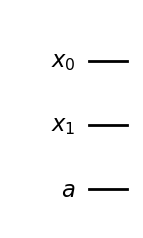

In [4]:
# draw the empty circuit
quantum_circuit.draw(output="mpl", style="bw")

In [5]:
# initial state
Statevector(quantum_circuit).draw("Latex")

<IPython.core.display.Latex object>

### Let's add a few gates:

(What these gates are and what they do will be explained later.)

In [6]:
quantum_circuit.h(quantum_register[0])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[1], ancilla_register[0])

# # equivalently, use indices
# quantum_circuit.h(0)
# quantum_circuit.cx(0, 1)
# quantum_circuit.cx(1, 2)

### You can plot the circuit:
(output and style are set to my preferred ones, but there are other options)

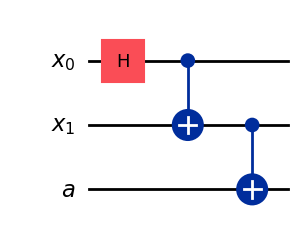

In [7]:
quantum_circuit.draw(output="mpl")

## You can extract the statevector:
psi is the statevector that you'd get if you ran the circuit, from left to right, starting from the all-zero configuration.

psi[x] is the amplitude of the configuration $|x_0 x_1 x_2> := |x_0> |x_1> |x_2>$, where x's binary representation is $x_2 x_1 x_0$ (note the reverse order). that is, psi[0] is the amplitude of $|000>$, psi[1] is the amplitude of $|100>$, and so on.

In [8]:
psi = Statevector(quantum_circuit)
psi

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


In [9]:
# print the statevector
psi.draw("Latex")

<IPython.core.display.Latex object>

In [10]:
# view the circuit as a combined gate
np.round(Operator(quantum_circuit).data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

### Similarly, you can get the probabilities:

In [11]:
probabilities = psi.probabilities()
probabilities

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

### <b>remark:</b>

the psi above is the 3-qubit Greenberger–Horne–Zeilinger (GHZ) state: $|\mathrm{GHZ}> = \tfrac{1}{\sqrt{2}} \left( |000> + |111> \right)$

# Important gates

Hadamard: $H = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & - 1 \end{bmatrix}$.

$|+> := H|0> \quad \& \quad |-> := H |1>$

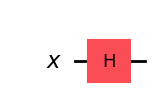

In [12]:
quantum_register = QuantumRegister(1, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.h(0)

quantum_circuit.draw(output="mpl")

## <b><u>Pauli gates</u></b>

<b>(Pauli) $X$ gate</b> (also known as, <b>NOT</b> or <b>bit-flip gate</b>): $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$.

$X |x> = |x \oplus 1>$

<b>(Pauli) $Z$ gate</b> (also known as the <b>phase-flip gate</b>): $Z = \begin{bmatrix} 1 & 0 \\ 0 & - 1 \end{bmatrix}$.

$Z |x> = (- 1)^x |x>$

### <b>note:</b>

$X |\pm> = \pm |\pm>$ and $Z |\pm> = |\mp>$

Equivalently: $XH = HZ$ and $ZH = HX$. $H$ is a change-of-base matrix between the eigenbases of $X$ and $Z$.

<b>(Pauli) $Y$ gate</b> $Y = \begin{bmatrix} 0 & - i \\ i & 0 \end{bmatrix} = i XZ$.

This is less used, but you should still know about.

### <b>note:</b>

All Pauli gates, $P \in \{ X, Y, Z \}$, satisfy:

$P^\dagger = P$, $P^2 = \mathbb{I}$.

If $\sigma_1 := X$, $\sigma_2 := Y$, and $\sigma_3 := Z$, then

$\sigma_a \sigma_b = i \sum\limits_{c = 1}^3 \epsilon_{abc} \sigma_c$, where $\epsilon_{abc}$ is the [Levi-Civita symbol](https://en.wikipedia.org/wiki/Levi-Civita_symbol).

In [13]:
#XY = iZ, YZ = iX, ZX = iY, YX = -iZ
#XX = YY = ZZ = I

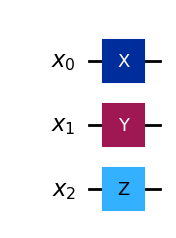

In [14]:
quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.x(quantum_register[0])

quantum_circuit.y(quantum_register[1])

quantum_circuit.z(quantum_register[2])

quantum_circuit.draw(output="mpl")

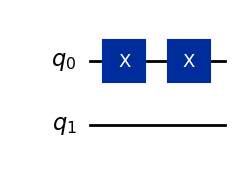

In [15]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(0)

qc.draw("mpl")

In [16]:
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>

In [17]:
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [18]:
# X = HZH, Z = HXH
#Rx = H Rz H, #Rz = H Rx H

## <b><u>General 1-qubit gates</u></b>

Every 1-qubit gate is equivalent to one of these:

$U(\theta, \varphi, \lambda) = \begin{bmatrix} \cos \left( \tfrac{\theta}{2} \right) & - e^{i \lambda} \sin \left( \tfrac{\theta}{2} \right) \\ e^{i \varphi} \sin \left( \tfrac{\theta}{2} \right) & e^{i (\varphi + \lambda)} \cos \left( \tfrac{\theta}{2} \right) \end{bmatrix}$,

for some $(\theta, \varphi, \lambda) \in \left[ 0, 2 \pi \right)^3$. See: [Qiskit $U$ gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate)

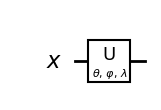

In [19]:
Theta, Phi, Lambda = Parameter(r"$\theta$"), Parameter(r"$\varphi$"), Parameter(r"$\lambda$")


quantum_register = QuantumRegister(1, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.u(Theta, Phi, Lambda, quantum_register[0])

quantum_circuit.draw(output="mpl", style="bw")

### Remark:

$(\theta, \varphi, \lambda)$ is not necessarily unique!

For example, $U(0, 0, 0) = U(0, \varphi, - \varphi)$, for all $\varphi$.

In case you familiar with Lie groups: The group of all 1-qubit gates is isomorphic to $\mathrm{SO}(3) \cong U(2) / (U(1) \mathrm{I})$.

### note:

$U (\theta, \varphi, \lambda)^{- 1} = U (\theta, \varphi, \lambda)^\dagger = U (- \theta, - \varphi, - \lambda)$.

### Question:

For any $(\theta_1, \varphi_1, \lambda_1), (\theta_2, \varphi_2, \lambda_2)$, compute $(\theta_3, \varphi_3, \lambda_3)$ and $\mu$, such that

$U (\theta_1, \varphi_1, \lambda_1) U (\theta_2, \varphi_2, \lambda_2) = e^{i \mu} U(\theta_3, \varphi_3, \lambda_3)$.

### Task:

Find $(\theta, \varphi, \lambda)$ for $H$, $X$, $Y$, and $Z$.

## <b>Rotations</b>

There are 3 "rotation" gates:

$R_X (\theta) = \begin{bmatrix} \cos \left( \tfrac{\theta}{2} \right) & - i \sin \left( \tfrac{\theta}{2} \right) \\ - i \sin \left( \tfrac{\theta}{2} \right) & \cos \left( \tfrac{\theta}{2} \right) \end{bmatrix} = \exp \left(- i \tfrac{\theta}{2} X \right) = U \left( \theta, - \tfrac{\pi}{2}, \tfrac{\pi}{2} \right)$,

$R_Y (\theta) = \begin{bmatrix} \cos \left( \tfrac{\theta}{2} \right) & - \sin \left( \tfrac{\theta}{2} \right) \\ \sin \left( \tfrac{\theta}{2} \right) & \cos \left( \tfrac{\theta}{2} \right) \end{bmatrix} = \exp \left(- i \tfrac{\theta}{2} Y \right) = U \left( \theta, 0, 0 \right)$.

$R_Z (\theta) = \begin{bmatrix} e^{- i \frac{\theta}{2}} & 0 \\ 0 & e^{i \frac{\theta}{2}} \end{bmatrix} = \exp \left(- i \tfrac{\theta}{2} Z \right) = e^{- i \frac{\theta}{2}} U \left( 0, 0, \theta \right)$.

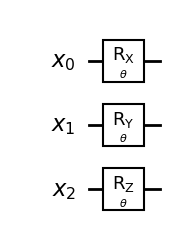

In [20]:
Theta = Parameter(r"$\theta$")

quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.rx(Theta, quantum_register[0])
quantum_circuit.ry(Theta, quantum_register[1])
quantum_circuit.rz(Theta, quantum_register[2])

quantum_circuit.draw(output="mpl", style="bw")

### Task:

Show that $U (\theta, \varphi, \lambda) = e^{i \frac{\lambda + \varphi}{2}} R_Z \left( \varphi + \tfrac{\pi}{2} \right) H R_Z (\theta) H R_Z \left( \lambda - \tfrac{\pi}{2} \right)$. In particular, a quantum computer that is "only" capable of implementing $H$ and arbitrary angle $Z$-rotations is, in fact, capable of implementing any 1-qubit gates.

## <b>Phase gates</b>

$P(\varphi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i \varphi} \end{bmatrix} = e^{- \frac{i\varphi}{2}} R_Z (\varphi)$.

Physically same as a $Z$-rotations, but often more convenient to work with. Important special cases:

$S = P \left( \tfrac{\pi}{2} \right) = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$ and $T = P \left( \tfrac{\pi}{4} \right) = \begin{bmatrix} 1 & 0 \\ 0 & \tfrac{1 + i}{\sqrt{2}} \end{bmatrix}$.

Note that, $S^2 = Z$ and $T^2 = S$.

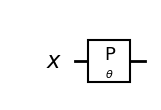

In [21]:
Theta = Parameter(r"$\theta$")

quantum_register = QuantumRegister(1, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.p(Theta, quantum_register[0])

quantum_circuit.draw(output="mpl", style="bw")

## <b><u>Controlled gates</u></b>

If $U$ is a 1-qubit gates, then the controlled version of $U$, usually called $CU$, is the following 2-qubit gate:

$CU |x>|y> = |x> U^x |y> = \left\{ \begin{array}{ll} |x> |y>, & \mbox{if } x = 0, \\ |x> U |y>, & \mbox{if } x = 1. \end{array} \right.$

### Remark:

For any $t \in \mathbb{R}$, the 1-qubit gates $U$ and $V := e^{it} U$ are equivalent. However, $CU$ and $CV$ are not!!!

## <b>CNOT</b>

(The most important) Example:

When $U = X$, $CX$ is also called "controlled-NOT" or "CNOT":

$CX |x>|y> = |x> |x \oplus y> = \left\{ \begin{array}{ll} |x> |y>, & \mbox{if } x = 0, \\ |x> |1 \oplus y>, & \mbox{if } x = 1. \end{array} \right.$

Its matrix in the computational basis:

$[CX] = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}$.

In [22]:
# use the top circuit as the most significant bit
# 1 0 0 0
# 0 1 0 0
# 0 0 0 1
# 0 0 1 0

# qiskit convention
# CX(a|00> + b|01> + c|10> + d|11>) = a|00> + b|11> + c|10> + d|01>

#(a, b, c, d) -> (a, d, c ,b)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


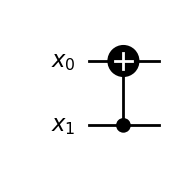

In [23]:
quantum_register = QuantumRegister(2, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.cx(quantum_register[1], quantum_register[0])

print(np.real(np.array(Operator(quantum_circuit))).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

### Algeraic properties

$CX^2$ is the identity circuit. Moreover, the following circuit is also trivial!

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


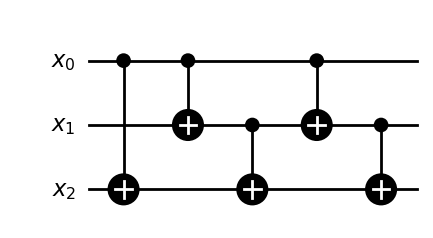

In [24]:
quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.cx(quantum_register[0], quantum_register[2])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[1], quantum_register[2])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[1], quantum_register[2])

print(np.real(np.array(Operator(quantum_circuit))).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

## Note about controls and target:

In the computational basis $CX$ "changes" the target qubit, but not the control one. However this phenomenon is illusory and in another basis the roles can be reversed. For example, in the $\{ |++>, |-+>, |+->, |--> \}$ basis, we have

$CX |++> = |++>$,

$CX |-+> = |-+>$,

$CX |+-> = |-->$,

and

$CX |--> = |+->$.

Thus, now it is "controlled" by the second qubit, in the sense that

$|\mathrm{sign}_1 \mathrm{sign}_2> = \left\{ \begin{array}{ll} |\mathrm{sign}_1 \mathrm{sign}_2>, & \mbox{if } \mathrm{sign}_2 = +, \\ |(- \mathrm{sign}_1) \mathrm{sign}_2>, & \mbox{if } \mathrm{sign}_2 = -. \end{array} \right.$



### Remark: The controlled version of any 1-qubit gate can be implemented with only 1-qubit and CNOT gates; cf. Figure 4.6. in Nielsen and Chuang.

Important example: <b>Controlled-phase gate</b>, $CP(\theta)$. Its matrix is

$[CP(\theta)] = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i \theta} \end{bmatrix}$.

Note that this gate is completely symmetric in the "controll" and "target" qubits.

$CP(\theta)$ can be decomposed into 2 CNOT gates and 3 phase gates.

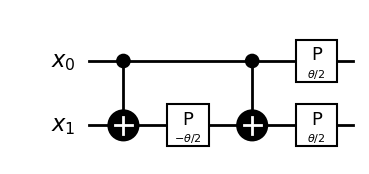

In [25]:
Theta = Parameter(r"$\theta$") # https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.Parameter

quantum_register = QuantumRegister(2, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.p(- Theta / 2, quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.p(Theta / 2, quantum_register[0])
quantum_circuit.p(Theta / 2, quantum_register[1])

# assign value to the parameter, define a new circuit bc
bc = quantum_circuit.assign_parameters({Theta: np.pi / 2})

quantum_circuit.draw(output="mpl", style="bw")

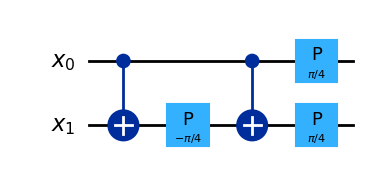

In [26]:
bc.draw("mpl")

In [27]:
np.round(Operator(bc).data, 3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

There also is a direct method to call it, if a decomposition is unnecessary.

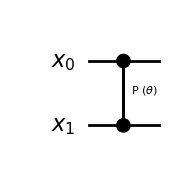

In [28]:
Theta = Parameter(r"$\theta$")

quantum_register = QuantumRegister(2, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.cp(Theta, quantum_register[0], quantum_register[1])

quantum_circuit.draw(output="mpl", style="bw")

## <b>SWAP gate</b>

$\mathrm{SWAP} |xy> = |yx>$.

Its matrix on the computational basis is

$[\mathrm{SWAP}] = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$.

[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


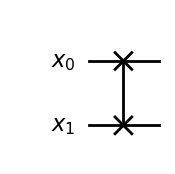

In [29]:
quantum_register = QuantumRegister(2, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.swap(quantum_register[0], quantum_register[1])

print(np.real(np.array(Operator(quantum_circuit))).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

Show that the swap gate can be implemented with 3 CNOT gates as follows:

[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


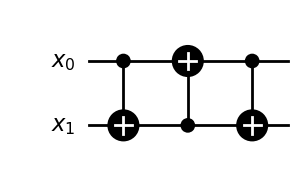

In [30]:
quantum_register = QuantumRegister(2, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.cx(quantum_register[1], quantum_register[0])
quantum_circuit.cx(quantum_register[0], quantum_register[1])

print(np.real(np.array(Operator(quantum_circuit))).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

# Toffoli gate

The Toffoli gates is a doubly-controlled $X$ gate, usually denoted as $CCX$:

$CCX |x y z> = |x y (xy \oplus z)>$.

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


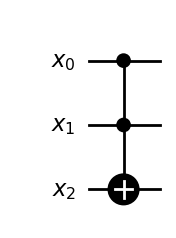

In [31]:
quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.ccx(quantum_register[0], quantum_register[1], quantum_register[2])

print(np.real(np.array(Operator(quantum_circuit))).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

The Toffoli gate can be implemented with $H$, $T$, and CNOT gates.

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


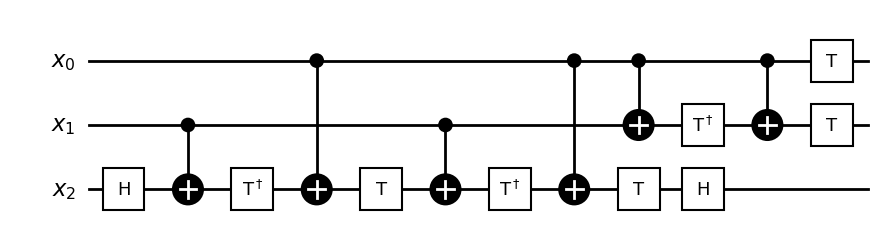

In [32]:
quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register)

quantum_circuit.h(quantum_register[2])
quantum_circuit.cx(quantum_register[1], quantum_register[2])
quantum_circuit.tdg(quantum_register[2]) # tdg is the method for the inverse of T
quantum_circuit.cx(quantum_register[0], quantum_register[2])
quantum_circuit.t(quantum_register[2])
quantum_circuit.cx(quantum_register[1], quantum_register[2])
quantum_circuit.tdg(quantum_register[2])
quantum_circuit.cx(quantum_register[0], quantum_register[2])
quantum_circuit.t(quantum_register[2])
quantum_circuit.h(quantum_register[2])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.tdg(quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.t(quantum_register[0])
quantum_circuit.t(quantum_register[1])

print(np.real(np.round(np.array(Operator(quantum_circuit)), 3)).astype(int)) # converting to real integer type just for better readablility

quantum_circuit.draw(output="mpl", style="bw")

### Task:

Simplify the following circuit so that it only has 1-, and 2-qubit gates.

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


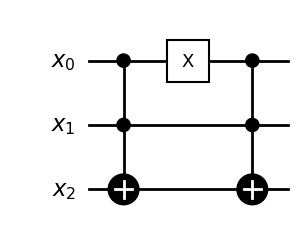

In [33]:
quantum_register = QuantumRegister(3, "x")

quantum_circuit = QuantumCircuit(quantum_register) #

quantum_circuit.ccx(quantum_register[0], quantum_register[1], quantum_register[2])
quantum_circuit.x(quantum_register[0])
quantum_circuit.ccx(quantum_register[0], quantum_register[1], quantum_register[2])


print(Operator(quantum_circuit).data)
quantum_circuit.draw(output="mpl", style="bw")

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


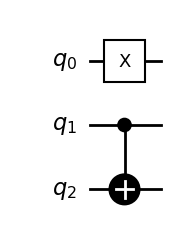

In [34]:
quantum_circuit = QuantumCircuit(3)
quantum_circuit.x(0)
quantum_circuit.cx(1,2)

print(Operator(quantum_circuit).data)
quantum_circuit.draw(output="mpl", style="bw")